In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as pl
%matplotlib inline

### Per-user total playcounts 

In [5]:
def showCountFreq(counts, label):
    N = float(len(counts))    # normalize over sample size (n_users)
    n, playcount = np.histogram(counts, bins=np.arange(counts.max()+1))
    pl.plot(n/N,'.', label=label)
    return n

In [6]:
counts_user_song = map(lambda x : np.load(x).flatten()[0], ('playcountsM.npy', 'playcountsF.npy'))
counts_user = map(lambda x: x.sum(1).A.reshape((x.shape[0],)), counts_user_song)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


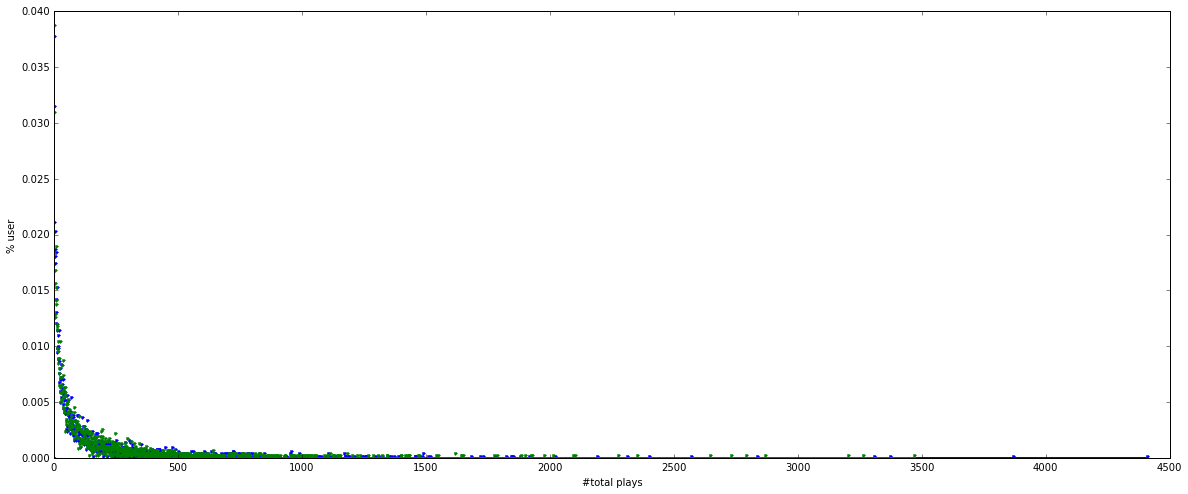

In [7]:
pl.figure(figsize = (20,8))
dist = showCountFreq(counts_user[0], 'male'),showCountFreq(counts_user[1], 'female')
pl.ylabel('% user')
pl.xlabel('#total plays')

In [9]:
duration_user_song = map(lambda x : np.load(x).flatten()[0], ('playtimeM.npy', 'playtimeF.npy'))
duration_user = map(lambda x: x.sum(1).A.reshape((x.shape[0],)), duration_user_song)

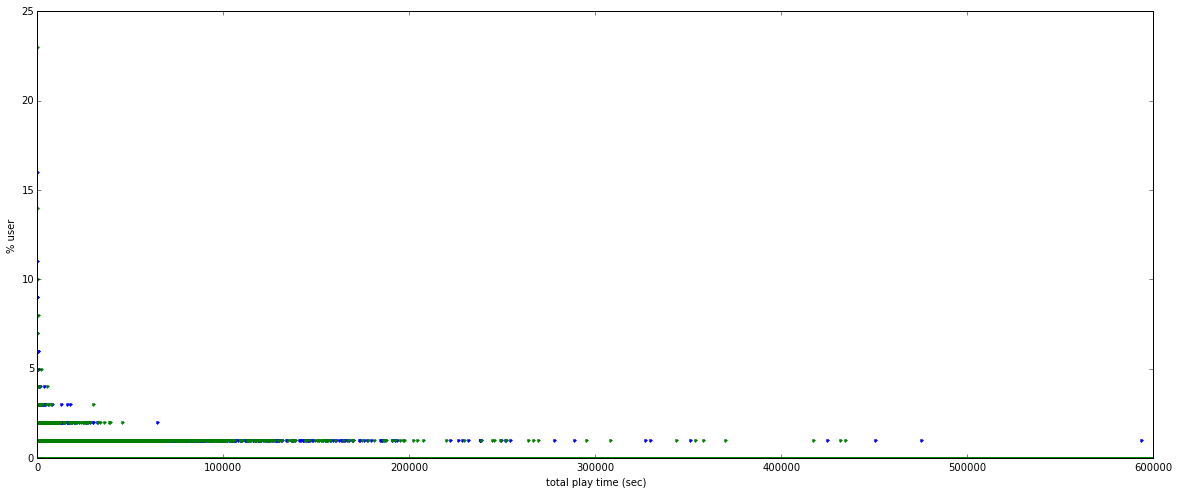

In [10]:
def showDurDist(durs, label):
    N = float(len(durs))    # normalize over sample size (n_users)
    n, bins = np.histogram(durs, bins=np.arange(0,6e8, 1e3))
    pl.plot(n,'.', label=label)
#pl.xticks(np.arange(0,6e5, 2e5), np.arange(0,6e5, 2e5))
pl.figure(figsize = (20,8))
showDurDist(duration_user[0], 'male')
showDurDist(duration_user[1], 'female')
pl.xlabel('total play time (sec)')
pl.ylabel('% user')

### Hypothesis Test
Null hypothesis: observations for different genders come from the same distribution. 
Apply chi-square test on play count data and KS test on both play count and play duration data.
5% significance level is chosen.

In [11]:
# Construct contigency table
D = np.zeros((2, max(map(len, dist))))
D[0,:len(dist[0])] = dist[0]
D[1,:len(dist[1])] = dist[1]

In [15]:
from scipy import stats
results = stats.chi2_contingency(D[:,(D.sum(0)>0)])
print 'p-value for play count data (as catagorical variable):', results[1]

p-value for play count data: 0.175940659543


The p-value is greater than 5%, so null hypothesis CANNOT be rejected.

We can also treat play count as a continuous value and apply KS test since it has a wide range and is intrinsically not catagorical. 

In [21]:
# Treat play counts as continuous values.
results = stats.ks_2samp(*counts_user)
print 'p-value for play count data (as continous variable):', results[1]

p-value for play count data (as continous variable): 0.224520354316


Difference still not significant enough.

Now we look at total play durations for both genders:

In [20]:
# Total play duration value is continuous. Use 
results = stats.ks_2samp(*duration_user)
print 'p-value for play duration data (as continous variable)', results[1]

p-value for play duration data (as continous variable) 0.0947466680315


Again p-value is greater than the significant level.

(TODO: extract more per-play and per-session listening behavior data instead of using total count/duration. )

### Conclusion
Judging from total play count and total play duration, female and male users do NOT behave significantly differently. 